# <br/>Data Cleaning & Pre-processing Walkthrough 

### Dataset: Fifa 21 Complete Player Dataset 
### By Kaitlin Tubbs <br/><br/>

In [ ]:
!git init

Initialized empty Git repository in /content/.git/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# os.chdir("content/drive/My Drive/Train-The-Trainer")
!git clone https://github.com/generationai/Train-The-Trainer.git

Cloning into 'Train-The-Trainer'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


<br/>
<br/>

# Data Cleaning
<br/>
<br/>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stat
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#read in the data

fifa = pd.read_csv('/content/Train-The-Trainer/fifa.csv')
fifa.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,...,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,...,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,...,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,...,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,...,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,...,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [ ]:
#This line checks the size of our dataset

shape = fifa.shape
print('Number of rows: ', shape[0] )
print('Number of columns: ', shape[1])

Number of rows:  17125
Number of columns:  107


## Here we will check to see if there are any missing values in the resulting dataframe

In [ ]:
missing = (fifa.isnull().sum()).sort_values(ascending=False)
print(missing[:20])

Loan Date End     16215
Composure           423
Position            413
D/W                  89
A/W                  89
Volleys              58
Balance              58
Curve                58
Vision               58
Joined               58
Sliding Tackle       58
Jumping              58
Agility              58
Club                 23
Club Logo            23
Interceptions         7
Positioning           7
Dribbling             0
Reactions             0
Shot Power            0
dtype: int64


From the output above, we can see that there are quite a few columns with missing data. Lets look at this missing data another way. Below we will look at the percent of missing data in each column, which is just the number of missing rows divided by the total number of rows:

In [ ]:
p_missing = (fifa.isnull().sum()/len(fifa)).sort_values(ascending=False)
print(p_missing[:20])

Loan Date End     0.946861
Composure         0.024701
Position          0.024117
D/W               0.005197
A/W               0.005197
Volleys           0.003387
Balance           0.003387
Curve             0.003387
Vision            0.003387
Joined            0.003387
Sliding Tackle    0.003387
Jumping           0.003387
Agility           0.003387
Club              0.001343
Club Logo         0.001343
Interceptions     0.000409
Positioning       0.000409
Dribbling         0.000000
Reactions         0.000000
Shot Power        0.000000
dtype: float64


Starting from the top with the most values missing, we see that the feature **'Loan Date End'** has about 95% of its data missing, so we will drop this entire column. 


In [ ]:
fifa = fifa.drop('Loan Date End', axis=1)
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,...,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,...,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,...,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,...,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,...,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,...,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


Next, starting from 'Composure' and going all the way down to 'Interceptions', these features have a very small percdentage of the data missing, with at most 2.4%. For the two columns with 2.4% missing data, we will use imputation to fill in the missing values. There are many different methods of imputation that can be used, but for our case we will use the mean and mode imputation methods, mean for continuous and mode for categorical variables.

For the remaining rows with at most 0.5% of missing data, we will just drop those select few rows that contain missing values. 

In [ ]:
fifa['Composure'].fillna(value=np.mean(fifa.Composure),inplace = True)

fifa['Position'].fillna(value=stat.mode(fifa.Position),inplace = True)


In [ ]:
drops = ['Jumping', 'Joined', 'Vision', 'Volleys','Balance', 'Curve' , 'Sliding Tackle','Agility', 'Positioning',
         'Interceptions', 'A/W', 'D/W', 'Club Logo', 'Club']
                
fifa.dropna(subset=drops,inplace=True)

### Finally, we will do a final check to ensure we addressed all the missing data in our dataframe

In [ ]:
missing = (fifa.isnull().sum()).sort_values(ascending=False)
print(missing[:20])
print('\n', 'No more missing data!')

Gender              0
Heading Accuracy    0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
dtype: int64

 No more missing data!



<br/>
<br/>
<br/>
<br/>


# Feature Engineering
<br/>
<br/>


## Next, we will go through a few feature transformations: 

We  modify the weight column in order to obtain the weight as an integer, dropping the 'lbs' ending. 

We do the same for height by parsing the string to obtain the feet and inches values then converting them to centimeters.

Finally, we parse 'Release clause' to obtain the amount of money as an integer

In [ ]:
#make height a float in cm
fifa['Ht in ft']=pd.to_numeric(fifa['Height'].str[0])
fifa['Ht in in']=pd.to_numeric(fifa['Height'].str.split("\'").str[1].str.strip('"'))
fifa['Ht in cm']=(fifa['Ht in ft']*12+fifa['Ht in in'])*2.54

#make weight an integer, dropping 'lbs' ending
fifa['Weight in lb']=pd.to_numeric(fifa['Weight'].str.strip('lbs'))

#drop original height and weight columns
fifa = fifa.drop(['Height','Weight'],axis=1)

In [ ]:
#make release clause a number, dropping symbol in front 
fifa['Release Clause']= fifa['Release Clause'].str.strip('€')

release = (fifa['Release Clause'].replace(r'[KM]+$', '', regex=True).astype(float) * \
            fifa['Release Clause'].str.extract(r'[\d\.]+([KM]+)', 
                                               expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
fifa['Release Clause'] = release
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,foot,Growth,Joined,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender,Ht in ft,Ht in in,Ht in cm,Weight in lb
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,Left,0,"Jul 1, 2008",€625K,€7K,0.0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,...,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,6,0,182.88,181
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,Right,0,"Jul 19, 2014",€600K,€7K,1100000.0,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,...,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,5,10,177.80,143
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,Right,0,"Jan 7, 2016",€1.1M,€15K,0.0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,...,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,5,9,175.26,161
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,Right,0,"Jul 16, 2018",€5.5M,€12K,7200000.0,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,...,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,5,7,170.18,150
5,61,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,https://cdn.sofifa.com/players/000/061/12_120.png,https://cdn.sofifa.com/teams/1826/light_60.png,https://cdn.sofifa.com/flags/de.png,70,Alemannia Aachen 2011 ~ 2012,Right,4,"Jan 1, 2011",€725K,€5K,0.0,2011 ~ 2012,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,...,2 ★,91,56,56,67,27,63,7,62+0,62+0,62+0,66+0,62+0,62+0,62+0,66+0,62+0,62+0,62+0,64+0,54+0,54+0,54+0,64+0,50+0,47+0,47+0,47+0,50+0,46+0,41+0,41+0,41+0,46+0,13+0,Male,5,8,172.72,163


## Next, we will experiment with Feature Engineering

As seen in the powerpoint, it might not be helpful to have a lot of stamina and no strength, and vice versa, as a professional soccer player. Here, we create a feature that averages the two to take into account players that have one or the other, yielding a higher values for players with a higher average of both strength and stamina. We the include this new feature in our data frame before modeling

In [ ]:
total = (fifa.Stamina+fifa.Strength)/2
fifa['Total_avg'] = total
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,foot,Growth,Joined,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender,Ht in ft,Ht in in,Ht in cm,Weight in lb,Total_avg
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,Left,0,"Jul 1, 2008",€625K,€7K,0.0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,...,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,6,0,182.88,181,68.5
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,Right,0,"Jul 19, 2014",€600K,€7K,1100000.0,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,...,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,5,10,177.80,143,62.0
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,Right,0,"Jan 7, 2016",€1.1M,€15K,0.0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,...,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,5,9,175.26,161,42.5
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,Right,0,"Jul 16, 2018",€5.5M,€12K,7200000.0,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,...,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,5,7,170.18,150,60.0
5,61,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,https://cdn.sofifa.com/players/000/061/12_120.png,https://cdn.sofifa.com/teams/1826/light_60.png,https://cdn.sofifa.com/flags/de.png,70,Alemannia Aachen 2011 ~ 2012,Right,4,"Jan 1, 2011",€725K,€5K,0.0,2011 ~ 2012,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,...,91,56,56,67,27,63,7,62+0,62+0,62+0,66+0,62+0,62+0,62+0,66+0,62+0,62+0,62+0,64+0,54+0,54+0,54+0,64+0,50+0,47+0,47+0,47+0,50+0,46+0,41+0,41+0,41+0,46+0,13+0,Male,5,8,172.72,163,62.5


## Feature Selection

### Here we will experiment with various statistical methods to determine which features are most important to include in the model 

In [ ]:
result = fifa.select_dtypes(include='number')
ybest = result['Release Clause']
ybest=ybest.astype('int')
Xbest = result.drop(['Release Clause','ID'],axis=1)
result

,ID,Age,OVA,BOV,POT,Growth,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Ht in ft,Ht in in,Ht in cm,Weight in lb,Total_avg
0,2,33,69,71,69,0,0.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,71,59,70,71,68,69,6,0,182.88,181,68.5
1,16,37,71,70,71,0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63,5,10,177.80,143,62.0
2,27,33,71,71,71,0,0.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,45,68,76,77,36,52,5,9,175.26,161,42.5
4,41,36,81,82,81,0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59,5,7,170.18,150,60.0
5,61,27,66,66,70,4,0.0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.940965,79,22,26,31.0,46,8,13,7,9,9,1649,360,91,56,56,67,27,63,5,8,172.72,163,62.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,66,69,5,0.0,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.000000,198,61,71,66.0,39,11,8,8,5,7,1367,302,54,30,37,48,64,69,6,6,198.12,165,66.5
17121,259090,18,56,58,66,10,273000.0,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.000000,132,34,42,56.0,57,12,15,7,12,11,1529,319,62,46,57,56,43,55,5,10,177.80,170,55.0
17122,259091,18,56,56,67,11,273000.0,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.000000,163,55,54,54.0,40,8,7,5,12,8,1430,303,63,35,44,52,54,55,5,9,175.26,154,53.5
17123,259101,20,62,62,73,11,784000.0,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.000000,180,57,62,61.0,51,15,13,8,6,9,1579,335,71,34,58,59,59,54,5,9,175.26,148,52.5


In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(Xbest,ybest)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xbest.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

             Specs          Score
46     Total Stats  286677.720406
40     Goalkeeping  170322.307035
11           Skill  106505.256218
5        Attacking   95320.444735
29       Mentality   76073.545437
36       Defending   60552.090064
47      Base Stats   45211.219570
23           Power   44842.567876
45     GK Reflexes   36984.033761
41       GK Diving   35634.757851
17        Movement   35590.205506
44  GK Positioning   34382.545102
42     GK Handling   33882.290864
43      GK Kicking   32395.685950
4           Growth   30204.226917
28      Long Shots   28806.975807
13           Curve   26399.508992
7        Finishing   25922.137543
32     Positioning   25336.256645
10         Volleys   24818.521607


### Here, we calculate the top correlated features with the predictor variable, Release Clause, to see which features are most influential in predicting the target value. 

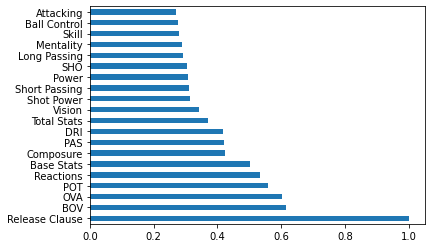

Release Clause    1.000000
BOV               0.614222
OVA               0.603262
POT               0.557047
Reactions         0.533426
Base Stats        0.500541
Composure         0.423533
PAS               0.421183
DRI               0.418784
Total Stats       0.368730
Vision            0.340636
Shot Power        0.313023
Short Passing     0.310241
Power             0.306819
SHO               0.303315
Long Passing      0.290444
Mentality         0.287199
Skill             0.280741
Ball Control      0.277599
Attacking         0.269595
Name: Release Clause, dtype: float64


In [ ]:
#Top Correlated features with target

df_corr = result.corr()['Release Clause'].sort_values(ascending=False).head(20)
top_corr_features = df_corr.index
# plot top most correlated features 
df_corr.plot(kind='barh')
plt.show()
print(df_corr)

<br/>
<br/>
<br/>
<br/>

# Train Test Split

<br/>
<br/>


After all of our data preprocessing is done, we can finally split the cleaned dataset into a training set and a test set. We will train the model on our training set, which will consist of hte most important features selected above, and then run the model on our test set to check the accuracy of the model's predictions

In [ ]:
#for this example, we will be predicting the value 'Release Clause', 
#so we remove that predictor variable from the dataset for training
#For this example, we are only including the 20 features most correlated with the target variable as calculated above

X = result[np.asarray(top_corr_features)]
y = result['Release Clause']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X.head()

,Release Clause,BOV,OVA,POT,Reactions,Base Stats,Composure,PAS,DRI,Total Stats,Vision,Shot Power,Short Passing,Power,SHO,Long Passing,Mentality,Skill,Ball Control,Attacking
0,0.0,71,69,69,69,408,59.940965,70,71,1929,66.0,74,71,347,59,69,320,338,71,313
1,1100000.0,70,71,71,65,385,79.000000,73,69,1906,73.0,75,76,324,69,71,362,369,71,337
2,0.0,71,71,71,59,354,59.940965,76,77,1770,74.0,72,77,284,68,69,317,387,78,337
4,7200000.0,82,81,81,75,420,89.000000,85,85,2014,93.0,67,90,297,70,83,370,408,90,367
5,0.0,66,66,70,65,360,59.940965,56,67,1649,58.0,71,58,315,56,44,256,276,62,271


In [ ]:
y.head()

0          0.0
1    1100000.0
2          0.0
4    7200000.0
5          0.0
Name: Release Clause, dtype: float64

## Next step: select a regression algorithm to predict 'Release Clause'!